In [1]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [6]:
cls = ['1', '2', '3', '4', '5', '6', '7', '8', '9']


In [7]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[0])

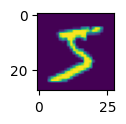

In [8]:
plot_sample(0)

In [9]:
X_train=X_train/255
X_test=X_test/255

In [16]:
cnn=models.Sequential([
    layers.Conv2D(filters=28,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=56,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(56,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#cnn.fit(X_train,y_train,epochs=10)

In [17]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1416 - accuracy: 0.9572
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0442 - accuracy: 0.9863
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0316 - accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0237 - accuracy: 0.9924
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0177 - accuracy: 0.9944


In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 6ms/step - loss: 0.0317 - accuracy: 0.9902


[0.031692761927843094, 0.9901999831199646]

In [19]:
y_pred=cnn.predict(X_test)
y_pred_cls=[np.argmax(element) for element in y_pred]
y_pred_cls[:5]

313/313 [==============================] - 2s 5ms/step


[7, 2, 1, 0, 4]

In [20]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report : \n", classification_report(y_test,y_pred_cls))

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

